## Crop and Fertilizer Recommendation System using ML

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
crop = pd.read_csv("Dataset/Crop_recommendation.csv")


In [4]:
crop.head() # Returns starting 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:

crop.tail() # Returns last 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape # shape - Returns rows and columns

(2200, 8)

In [7]:
crop.info() # Returns info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
crop.isnull() # Check for missing values

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [9]:
crop.isnull().sum() # Returns the sum of missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated() # Check for duplicated values

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [11]:
crop.duplicated().sum() # Return sum of duplicated values

np.int64(0)

In [ ]:
crop.describe() # To check the statistics of the dataset

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
 
crop.columns # Shows all the columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
crop['label'].value_counts() # Check feature of specific columns

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [21]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


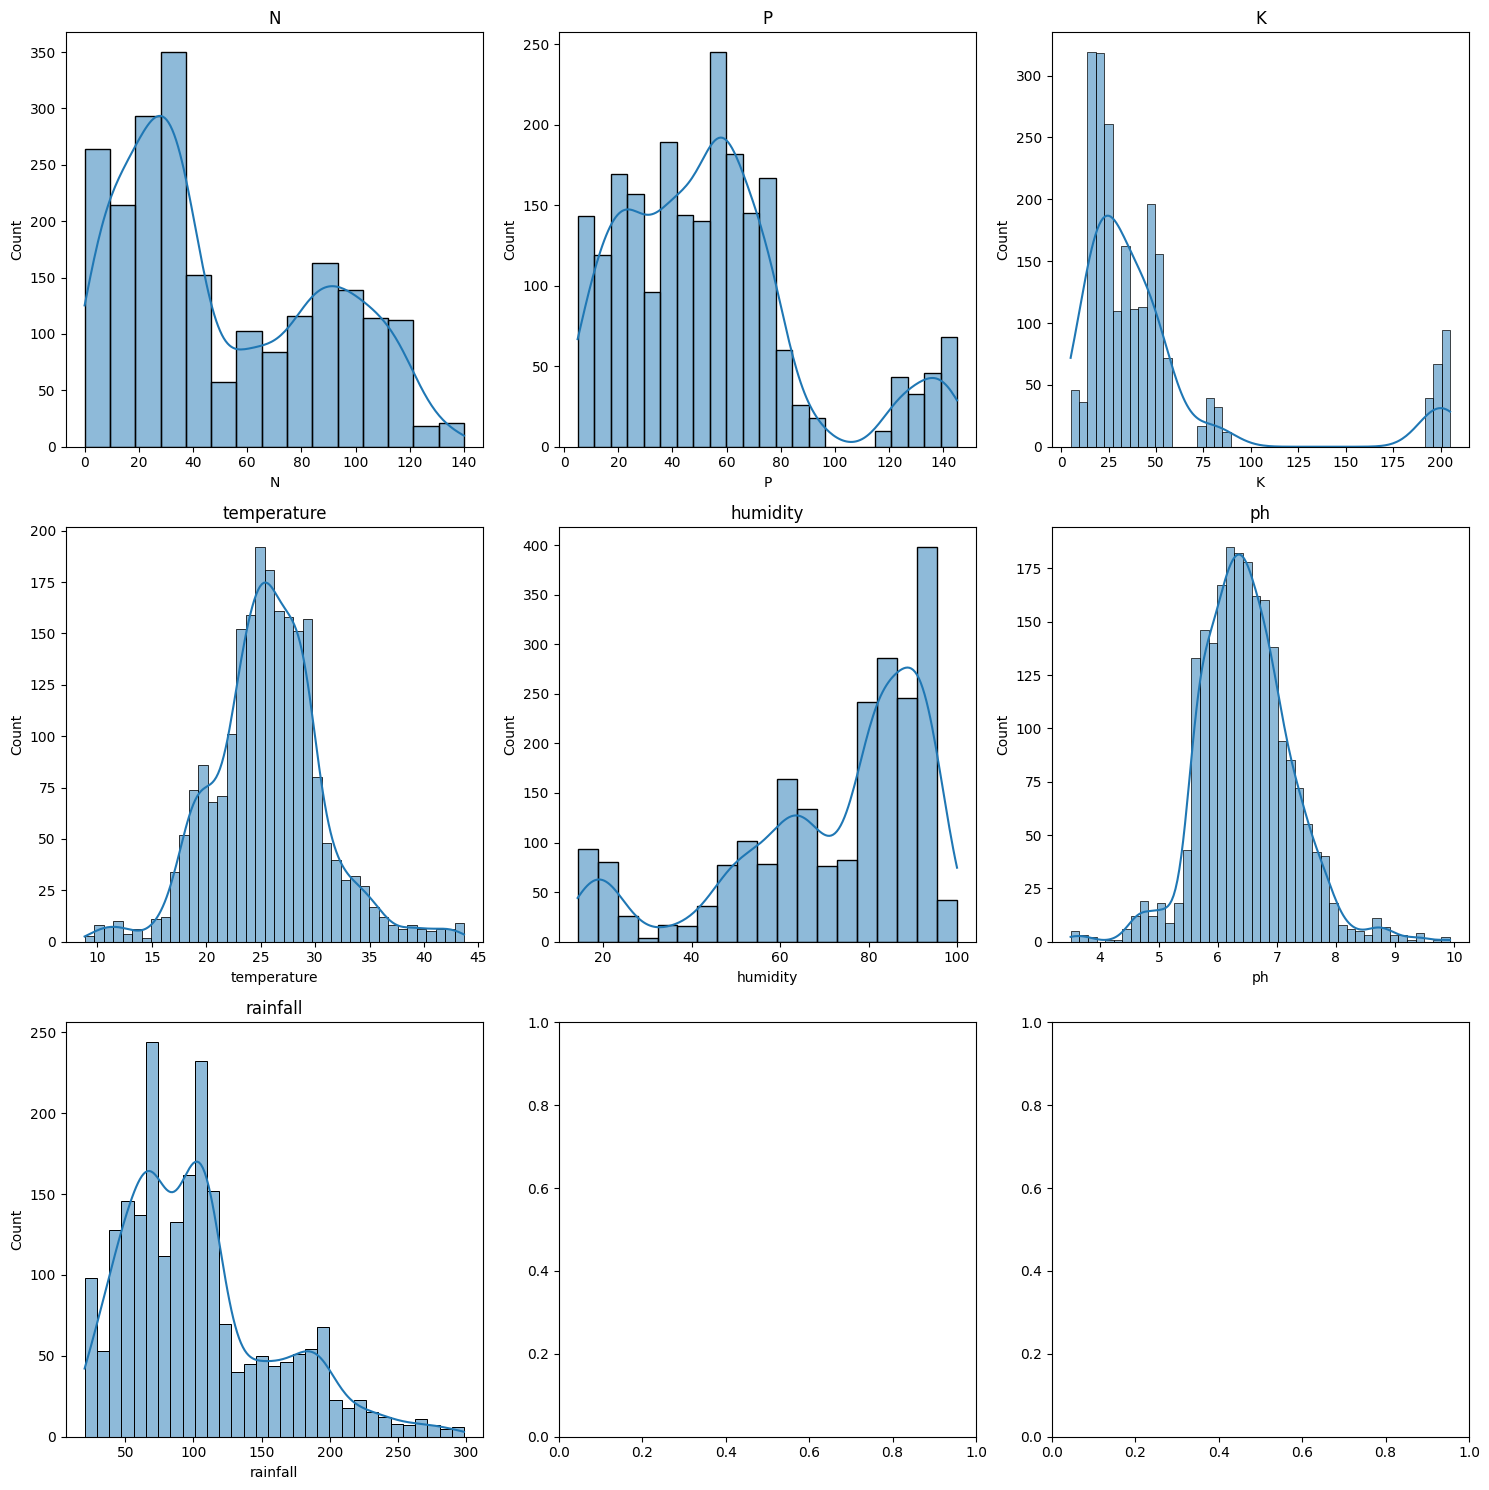

In [22]:
# Visualize the distribution of each feature

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Loop through features and corresponding subplots
for feature, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[feature], ax=subplot, kde=True)
    subplot.set_title(feature)  # Fixing method call

# Adjust layout
plt.tight_layout()
plt.show()